In [1]:
import pandas as pd

In [2]:
# Buid a machine learning model
# Take the log of the pricing data to make it stationary
# Apply an ARIMA or SARIMA model to predict
# Build upon the prediction for the classification (buy, sell or hold)^
# Seperate tables or filter within one big table
# Do an EDA for all the different share prices

# Input parameters:
# Open price
# Close price
# Day high
# Day low
# Adj. close price

In [3]:
data_df = pd.read_csv("data/shareprices.csv")

In [4]:
data_df.head(20)

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume
0,A,45846,2019-04-01,80.96,81.77,80.96,81.56,78.33,1522681
1,A,45846,2019-04-02,81.71,81.76,81.03,81.14,77.93,1203037
2,A,45846,2019-04-03,81.54,82.02,81.46,81.94,78.70,2141025
3,A,45846,2019-04-04,81.84,82.05,80.44,80.83,77.63,2180112
4,A,45846,2019-04-05,81.19,81.92,81.05,81.47,78.25,1502875
5,A,45846,2019-04-08,81.57,81.71,80.58,81.69,78.46,783350
6,A,45846,2019-04-09,81.56,81.72,81.27,81.42,78.20,1254742
7,A,45846,2019-04-10,81.45,82.24,81.45,81.68,78.45,982886
8,A,45846,2019-04-11,81.88,81.92,80.89,81.08,77.87,1071479
9,A,45846,2019-04-12,81.43,82.06,80.90,80.98,77.77,1249295


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5775398 entries, 0 to 5775397
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Ticker      object 
 1   SimFinId    int64  
 2   Date        object 
 3   Open        float64
 4   High        float64
 5   Low         float64
 6   Close       float64
 7   Adj. Close  float64
 8   Volume      int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 396.6+ MB


In [6]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5775398 entries, 0 to 5775397
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Ticker      object        
 1   SimFinId    int64         
 2   Date        datetime64[ns]
 3   Open        float64       
 4   High        float64       
 5   Low         float64       
 6   Close       float64       
 7   Adj. Close  float64       
 8   Volume      int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 396.6+ MB


In [7]:
len(data_df.Ticker.unique())

5556

In [8]:
# TO DO : choose 5 tickers & eliminate rest


In [9]:
#create label

df_AAPL = data_df[data_df["Ticker"]=="AAPL"]
df_AAPL.sort_values(by="Date")

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume
14264,AAPL,111052,2019-04-01,47.91,47.92,47.09,47.81,45.81,111447856
14265,AAPL,111052,2019-04-02,47.77,48.62,47.76,48.51,46.47,91062928
14266,AAPL,111052,2019-04-03,48.31,49.12,48.29,48.84,46.79,93087320
14267,AAPL,111052,2019-04-04,48.70,49.09,48.28,48.92,46.87,76457100
14268,AAPL,111052,2019-04-05,49.11,49.27,48.98,49.25,47.19,74106576
...,...,...,...,...,...,...,...,...,...
15499,AAPL,111052,2024-02-27,181.10,183.92,179.56,182.63,181.77,54318851
15500,AAPL,111052,2024-02-28,182.51,183.12,180.13,181.42,180.57,48953939
15501,AAPL,111052,2024-02-29,181.27,182.57,179.53,180.75,179.90,136682597
15502,AAPL,111052,2024-03-01,179.55,180.53,177.38,179.66,178.82,73563082


In [10]:
df_AMZN = data_df[data_df["Ticker"]=="AMZN"]
df_AMZN.sort_values(by="Date")

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume
319096,AMZN,62747,2019-04-01,90.01,90.78,89.94,90.71,90.71,84775040
319097,AMZN,62747,2019-04-02,90.55,91.00,90.26,90.70,90.70,68962300
319098,AMZN,62747,2019-04-03,91.34,91.50,90.48,91.03,91.03,79611800
319099,AMZN,62747,2019-04-04,91.03,91.44,90.21,90.94,90.94,72477340
319100,AMZN,62747,2019-04-05,91.45,91.93,91.26,91.86,91.86,72809520
...,...,...,...,...,...,...,...,...,...
320331,AMZN,62747,2024-02-27,174.07,174.62,172.86,173.54,173.54,31141732
320332,AMZN,62747,2024-02-28,172.44,174.05,172.27,173.16,173.16,28180482
320333,AMZN,62747,2024-02-29,173.01,177.22,172.85,176.76,176.76,53805359
320334,AMZN,62747,2024-03-01,176.75,178.72,176.07,178.22,178.22,31981152


In [11]:
df_GOOG = data_df[data_df["Ticker"]=="GOOG"]
df_GOOG.sort_values(by="Date")

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume
2264796,GOOG,18,2019-04-01,59.20,59.83,59.10,59.72,59.51,25055140
2264797,GOOG,18,2019-04-02,59.77,60.07,59.29,60.02,59.81,16559460
2264798,GOOG,18,2019-04-03,60.37,60.81,60.02,60.30,60.08,20356760
2264799,GOOG,18,2019-04-04,60.30,60.78,60.21,60.75,60.53,19014940
2264800,GOOG,18,2019-04-05,60.75,60.81,60.25,60.36,60.14,18143040
...,...,...,...,...,...,...,...,...,...
2266031,GOOG,18,2024-02-27,139.41,140.49,138.50,140.10,139.60,22363981
2266032,GOOG,18,2024-02-28,139.10,139.28,136.64,137.43,136.94,30628702
2266033,GOOG,18,2024-02-29,138.35,139.95,137.57,139.78,139.28,35485006
2266034,GOOG,18,2024-03-01,139.61,140.00,137.97,138.08,137.58,28551525


In [12]:
df_MSFT = data_df[data_df["Ticker"]=="MSFT"]
df_MSFT.sort_values(by="Date")

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume
3434520,MSFT,59265,2019-04-01,118.95,119.11,118.10,119.02,112.42,22789103
3434521,MSFT,59265,2019-04-02,119.06,119.48,118.52,119.19,112.58,18142297
3434522,MSFT,59265,2019-04-03,119.86,120.43,119.15,119.97,113.32,22860744
3434523,MSFT,59265,2019-04-04,120.10,120.23,118.38,119.36,112.75,20112848
3434524,MSFT,59265,2019-04-05,119.39,120.23,119.37,119.89,113.25,15826245
...,...,...,...,...,...,...,...,...,...
3435755,MSFT,59265,2024-02-27,407.99,408.32,403.85,407.48,404.41,14835827
3435756,MSFT,59265,2024-02-28,408.18,409.30,405.32,407.72,404.65,13183125
3435757,MSFT,59265,2024-02-29,408.64,414.20,405.92,413.64,410.53,31947263
3435758,MSFT,59265,2024-03-01,411.27,415.87,410.88,415.50,412.37,17823445


In [13]:
df_TSLA = data_df[data_df["Ticker"]=="TSLA"]
df_TSLA.sort_values(by="Date")

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume
5196863,TSLA,56317,2019-04-01,18.84,19.28,18.75,19.28,19.28,121656585
5196864,TSLA,56317,2019-04-02,19.22,19.30,18.93,19.06,19.06,82184100
5196865,TSLA,56317,2019-04-03,19.15,19.74,19.14,19.45,19.45,118947960
5196866,TSLA,56317,2019-04-04,17.46,18.08,17.37,17.85,17.85,355810935
5196867,TSLA,56317,2019-04-05,17.99,18.41,17.74,18.33,18.33,195573855
...,...,...,...,...,...,...,...,...,...
5198098,TSLA,56317,2024-02-27,204.04,205.60,198.26,199.73,199.73,108645412
5198099,TSLA,56317,2024-02-28,200.42,205.30,198.44,202.04,202.04,99806173
5198100,TSLA,56317,2024-02-29,204.18,205.28,198.45,201.88,201.88,85906974
5198101,TSLA,56317,2024-03-01,200.52,204.52,198.50,202.64,202.64,82243119


In [14]:
comp_list=[df_AAPL,df_AMZN,df_GOOG,df_MSFT,df_TSLA]

In [15]:
for i in comp_list:
    i = i[['Ticker', 'Date', 'Close']].sort_values(by=['Ticker', 'Date'])
    i.reset_index(drop=True, inplace=True)
    print(i.head(3))


  Ticker       Date  Close
0   AAPL 2019-04-01  47.81
1   AAPL 2019-04-02  48.51
2   AAPL 2019-04-03  48.84
  Ticker       Date  Close
0   AMZN 2019-04-01  90.71
1   AMZN 2019-04-02  90.70
2   AMZN 2019-04-03  91.03
  Ticker       Date  Close
0   GOOG 2019-04-01  59.72
1   GOOG 2019-04-02  60.02
2   GOOG 2019-04-03  60.30
  Ticker       Date   Close
0   MSFT 2019-04-01  119.02
1   MSFT 2019-04-02  119.19
2   MSFT 2019-04-03  119.97
  Ticker       Date  Close
0   TSLA 2019-04-01  19.28
1   TSLA 2019-04-02  19.06
2   TSLA 2019-04-03  19.45


In [16]:
# Define the number of lag days
n_lags = 3

# Create lag columns
for i in comp_list:   
    for j in range(1, n_lags + 1):
        i[f'd-{j}'] = i.groupby('Ticker')['Close'].shift(j)
    print(i.head(1))

      Ticker  SimFinId       Date   Open   High    Low  Close  Adj. Close  \
14264   AAPL    111052 2019-04-01  47.91  47.92  47.09  47.81       45.81   

          Volume  d-1  d-2  d-3  
14264  111447856  NaN  NaN  NaN  
       Ticker  SimFinId       Date   Open   High    Low  Close  Adj. Close  \
319096   AMZN     62747 2019-04-01  90.01  90.78  89.94  90.71       90.71   

          Volume  d-1  d-2  d-3  
319096  84775040  NaN  NaN  NaN  
        Ticker  SimFinId       Date  Open   High   Low  Close  Adj. Close  \
2264796   GOOG        18 2019-04-01  59.2  59.83  59.1  59.72       59.51   

           Volume  d-1  d-2  d-3  
2264796  25055140  NaN  NaN  NaN  
        Ticker  SimFinId       Date    Open    High    Low   Close  \
3434520   MSFT     59265 2019-04-01  118.95  119.11  118.1  119.02   

         Adj. Close    Volume  d-1  d-2  d-3  
3434520      112.42  22789103  NaN  NaN  NaN  
        Ticker  SimFinId       Date   Open   High    Low  Close  Adj. Close  \
5196863   TSL

C:\Users\Not for you\AppData\Local\Temp\ipykernel_11844\2725317728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i[f'd-{j}'] = i.groupby('Ticker')['Close'].shift(j)
C:\Users\Not for you\AppData\Local\Temp\ipykernel_11844\2725317728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i[f'd-{j}'] = i.groupby('Ticker')['Close'].shift(j)
C:\Users\Not for you\AppData\Local\Temp\ipykernel_11844\2725317728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [17]:
for i in comp_list:    
    i.dropna(inplace=True)# Drop NaN values and reset index
    i.reset_index(drop=True, inplace=True)  # Fixes index misalignment

    print(i.head(1))  # Confirm no NaN values remain


  Ticker  SimFinId       Date  Open   High    Low  Close  Adj. Close  \
0   AAPL    111052 2019-04-04  48.7  49.09  48.28  48.92       46.87   

     Volume    d-1    d-2    d-3  
0  76457100  48.84  48.51  47.81  
  Ticker  SimFinId       Date   Open   High    Low  Close  Adj. Close  \
0   AMZN     62747 2019-04-04  91.03  91.44  90.21  90.94       90.94   

     Volume    d-1   d-2    d-3  
0  72477340  91.03  90.7  90.71  
  Ticker  SimFinId       Date  Open   High    Low  Close  Adj. Close  \
0   GOOG        18 2019-04-04  60.3  60.78  60.21  60.75       60.53   

     Volume   d-1    d-2    d-3  
0  19014940  60.3  60.02  59.72  
  Ticker  SimFinId       Date   Open    High     Low   Close  Adj. Close  \
0   MSFT     59265 2019-04-04  120.1  120.23  118.38  119.36      112.75   

     Volume     d-1     d-2     d-3  
0  20112848  119.97  119.19  119.02  
  Ticker  SimFinId       Date   Open   High    Low  Close  Adj. Close  \
0   TSLA     56317 2019-04-04  17.46  18.08  17.37  17.

C:\Users\Not for you\AppData\Local\Temp\ipykernel_11844\3388416756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.dropna(inplace=True)# Drop NaN values and reset index
C:\Users\Not for you\AppData\Local\Temp\ipykernel_11844\3388416756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.dropna(inplace=True)# Drop NaN values and reset index
C:\Users\Not for you\AppData\Local\Temp\ipykernel_11844\3388416756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [18]:
# Define features (X) and target (y)
X_AAPL = df_AAPL.drop(columns=['Ticker', 'Date', 'Close'])  # Features: d-1, d-2, d-3
y_AAPL = df_AAPL['Close']  # Target: Next day's Close price

print(X_AAPL.head())  # Check feature matrix
print(y_AAPL.head())  # Check target values

   SimFinId   Open   High    Low  Adj. Close     Volume    d-1    d-2    d-3
0    111052  48.70  49.09  48.28       46.87   76457100  48.84  48.51  47.81
1    111052  49.11  49.27  48.98       47.19   74106576  48.92  48.84  48.51
2    111052  49.10  50.06  49.09       47.93  103526788  49.25  48.92  48.84
3    111052  50.08  50.71  49.81       47.79  143072948  50.02  49.25  48.92
4    111052  49.67  50.19  49.55       48.06   86781152  49.88  50.02  49.25
0    48.92
1    49.25
2    50.02
3    49.88
4    50.16
Name: Close, dtype: float64


In [19]:
X_AAPL=X_AAPL.drop(columns=['SimFinId','Open','High','Low','Adj. Close','Volume'])
X_AAPL.head()

,d-1,d-2,d-3
0,48.84,48.51,47.81
1,48.92,48.84,48.51
2,49.25,48.92,48.84
3,50.02,49.25,48.92
4,49.88,50.02,49.25


In [20]:
X_AMZN = df_AMZN.drop(columns=['Ticker', 'Date', 'Close'])  # Features: d-1, d-2, d-3
y_AMZN = df_AMZN['Close']  # Target: Next day's Close price

print(X_AMZN.head())  # Check feature matrix
print(y_AMZN.head())  # Check target values

   SimFinId   Open   High    Low  Adj. Close    Volume    d-1    d-2    d-3
0     62747  91.03  91.44  90.21       90.94  72477340  91.03  90.70  90.71
1     62747  91.45  91.93  91.26       91.86  72809520  90.94  91.03  90.70
2     62747  91.66  92.51  91.26       92.49  75056820  91.86  90.94  91.03
3     62747  92.27  92.65  91.59       91.79  74287360  92.49  91.86  90.94
4     62747  92.05  92.40  91.44       92.37  59279460  91.79  92.49  91.86
0    90.94
1    91.86
2    92.49
3    91.79
4    92.37
Name: Close, dtype: float64


In [21]:
X_AMZN=X_AMZN.drop(columns=['SimFinId','Open','High','Low','Adj. Close','Volume'])
X_AMZN.head()

,d-1,d-2,d-3
0,91.03,90.70,90.71
1,90.94,91.03,90.70
2,91.86,90.94,91.03
3,92.49,91.86,90.94
4,91.79,92.49,91.86


In [22]:
X_GOOG = df_GOOG.drop(columns=['Ticker', 'Date', 'Close'])  # Features: d-1, d-2, d-3
y_GOOG = df_GOOG['Close']  # Target: Next day's Close price

print(X_GOOG.head())  # Check feature matrix
print(y_GOOG.head())  # Check target values

   SimFinId   Open   High    Low  Adj. Close    Volume    d-1    d-2    d-3
0        18  60.30  60.78  60.21       60.53  19014940  60.30  60.02  59.72
1        18  60.75  60.81  60.25       60.14  18143040  60.75  60.30  60.02
2        18  60.39  60.43  59.99       59.98  17207260  60.36  60.75  60.30
3        18  59.80  60.11  59.65       59.65  17527620  60.19  60.36  60.75
4        18  60.03  60.19  59.82       59.89  14492860  59.86  60.19  60.36
0    60.75
1    60.36
2    60.19
3    59.86
4    60.11
Name: Close, dtype: float64


In [23]:
X_GOOG=X_GOOG.drop(columns=['SimFinId','Open','High','Low','Adj. Close','Volume'])
X_GOOG.head()

,d-1,d-2,d-3
0,60.30,60.02,59.72
1,60.75,60.30,60.02
2,60.36,60.75,60.30
3,60.19,60.36,60.75
4,59.86,60.19,60.36


In [24]:
X_MSFT = df_MSFT.drop(columns=['Ticker', 'Date', 'Close'])  # Features: d-1, d-2, d-3
y_MSFT = df_MSFT['Close']  # Target: Next day's Close price

print(X_MSFT.head())  # Check feature matrix
print(y_MSFT.head())  # Check target values

   SimFinId    Open    High     Low  Adj. Close    Volume     d-1     d-2  \
0     59265  120.10  120.23  118.38      112.75  20112848  119.97  119.19   
1     59265  119.39  120.23  119.37      113.25  15826245  119.36  119.97   
2     59265  119.81  120.02  118.64      113.28  15116186  119.89  119.36   
3     59265  118.63  119.54  118.58      112.67  17611981  119.93  119.89   
4     59265  119.76  120.35  119.54      113.53  16477169  119.28  119.93   

      d-3  
0  119.02  
1  119.19  
2  119.97  
3  119.36  
4  119.89  
0    119.36
1    119.89
2    119.93
3    119.28
4    120.19
Name: Close, dtype: float64


In [25]:
X_MSFT=X_MSFT.drop(columns=['SimFinId','Open','High','Low','Adj. Close','Volume'])
X_MSFT.head()

,d-1,d-2,d-3
0,119.97,119.19,119.02
1,119.36,119.97,119.19
2,119.89,119.36,119.97
3,119.93,119.89,119.36
4,119.28,119.93,119.89


In [26]:
X_TSLA = df_TSLA.drop(columns=['Ticker', 'Date', 'Close'])  # Features: d-1, d-2, d-3
y_TSLA = df_TSLA['Close']  # Target: Next day's Close price

print(X_TSLA.head())  # Check feature matrix
print(y_TSLA.head())  # Check target values

   SimFinId   Open   High    Low  Adj. Close     Volume    d-1    d-2    d-3
0     56317  17.46  18.08  17.37       17.85  355810935  19.45  19.06  19.28
1     56317  17.99  18.41  17.74       18.33  195573855  17.85  19.45  19.06
2     56317  18.51  18.74  18.03       18.21  156156540  18.33  17.85  19.45
3     56317  18.11  18.33  17.97       18.15   88560465  18.21  18.33  17.85
4     56317  18.45  18.56  18.19       18.40  105919710  18.15  18.21  18.33
0    17.85
1    18.33
2    18.21
3    18.15
4    18.40
Name: Close, dtype: float64


In [27]:
X_TSLA=X_TSLA.drop(columns=['SimFinId','Open','High','Low','Adj. Close','Volume'])
X_TSLA.head()

,d-1,d-2,d-3
0,19.45,19.06,19.28
1,17.85,19.45,19.06
2,18.33,17.85,19.45
3,18.21,18.33,17.85
4,18.15,18.21,18.33


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [29]:
# Train-test split (time-based, no shuffle)
X_AAPL_train, X_AAPL_test, y_AAPL_train, y_AAPL_test = train_test_split(X_AAPL, y_AAPL, test_size=0.2, shuffle=False)
X_AMZN_train, X_AMZN_test, y_AMZN_train, y_AMZN_test = train_test_split(X_AMZN, y_AMZN, test_size=0.2, shuffle=False)
X_GOOG_train, X_GOOG_test, y_GOOG_train, y_GOOG_test = train_test_split(X_GOOG, y_GOOG, test_size=0.2, shuffle=False)
X_MSFT_train, X_MSFT_test, y_MSFT_train, y_MSFT_test = train_test_split(X_MSFT, y_MSFT, test_size=0.2, shuffle=False)
X_TSLA_train, X_TSLA_test, y_TSLA_train, y_TSLA_test = train_test_split(X_TSLA, y_TSLA, test_size=0.2, shuffle=False)
# Train a Linear Regression model
model_AAPL = LinearRegression()
model_AMZN = LinearRegression()
model_GOOG = LinearRegression()
model_MSFT = LinearRegression()
model_TSLA = LinearRegression()

model_AAPL.fit(X_AAPL_train, y_AAPL_train)
model_AMZN.fit(X_AMZN_train, y_AMZN_train)
model_GOOG.fit(X_GOOG_train, y_GOOG_train)
model_MSFT.fit(X_MSFT_train, y_MSFT_train)
model_TSLA.fit(X_TSLA_train, y_TSLA_train)

# Make predictions
y_AAPL_pred = model_AAPL.predict(X_AAPL_test)
y_AMZN_pred = model_AMZN.predict(X_AMZN_test)
y_GOOG_pred = model_GOOG.predict(X_GOOG_test)
y_MSFT_pred = model_MSFT.predict(X_MSFT_test)
y_TSLA_pred = model_TSLA.predict(X_TSLA_test)

# Compute evaluation metrics
mae_AAPL = mean_absolute_error(y_AAPL_test, y_AAPL_pred)
mse_AAPL = mean_squared_error(y_AAPL_test, y_AAPL_pred)
rmse_AAPL = np.sqrt(mse_AAPL)

mae_AMZN = mean_absolute_error(y_AMZN_test, y_AMZN_pred)
mse_AMZN = mean_squared_error(y_AMZN_test, y_AMZN_pred)
rmse_AMZN = np.sqrt(mse_AMZN)

mae_GOOG = mean_absolute_error(y_GOOG_test, y_GOOG_pred)
mse_GOOG = mean_squared_error(y_GOOG_test, y_GOOG_pred)
rmse_GOOG = np.sqrt(mse_GOOG)

mae_MSFT = mean_absolute_error(y_MSFT_test, y_MSFT_pred)
mse_MSFT = mean_squared_error(y_MSFT_test, y_MSFT_pred)
rmse_MSFT = np.sqrt(mse_MSFT)

mae_TSLA = mean_absolute_error(y_TSLA_test, y_TSLA_pred)
mse_TSLA = mean_squared_error(y_TSLA_test, y_TSLA_pred)
rmse_TSLA = np.sqrt(mse_TSLA)

print(f'MAE for Apple: {mae_AAPL:.2f}')
print(f'MSE for Apple: {mse_AAPL:.2f}')
print(f'RMSE for Apple: {rmse_AAPL:.2f}')

print(f'MAE for Amazon: {mae_AMZN:.2f}')
print(f'MSE for Amazon: {mse_AMZN:.2f}')
print(f'RMSE for Amazon: {rmse_AMZN:.2f}')

print(f'MAE for Google: {mae_GOOG:.2f}')
print(f'MSE for Google: {mse_GOOG:.2f}')
print(f'RMSE for Google: {rmse_GOOG:.2f}')

print(f'MAE for Microsoft: {mae_MSFT:.2f}')
print(f'MSE for Microsoft: {mse_MSFT:.2f}')
print(f'RMSE for Microsoft: {rmse_MSFT:.2f}')

print(f'MAE for Tesla: {mae_TSLA:.2f}')
print(f'MSE for Tesla: {mse_TSLA:.2f}')
print(f'RMSE for Tesla: {rmse_TSLA:.2f}')

MAE for Apple: 1.64
MSE for Apple: 4.64
RMSE for Apple: 2.15
MAE for Amazon: 1.89
MSE for Amazon: 6.42
RMSE for Amazon: 2.53
MAE for Google: 1.66
MSE for Google: 5.22
RMSE for Google: 2.28
MAE for Microsoft: 3.69
MSE for Microsoft: 22.77
RMSE for Microsoft: 4.77
MAE for Tesla: 5.02
MSE for Tesla: 47.25
RMSE for Tesla: 6.87


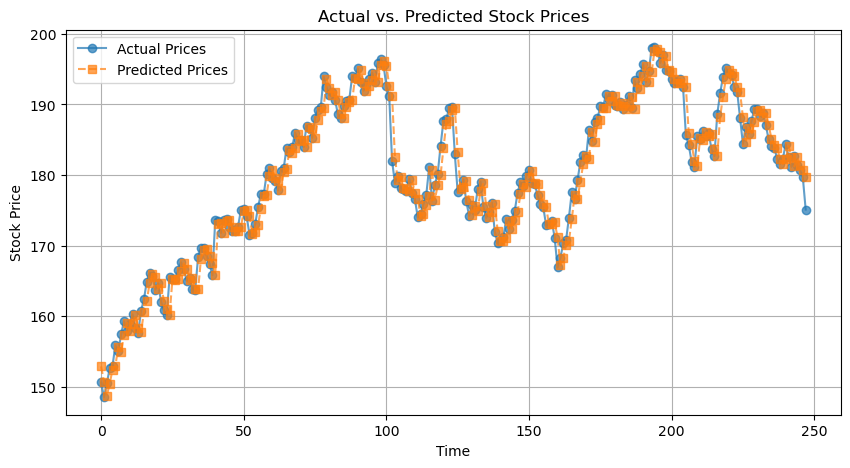

In [30]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted stock prices
plt.figure(figsize=(10, 5))
plt.plot(y_AAPL_test.values, label='Actual Prices', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_AAPL_pred, label='Predicted Prices', linestyle='--', marker='s', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

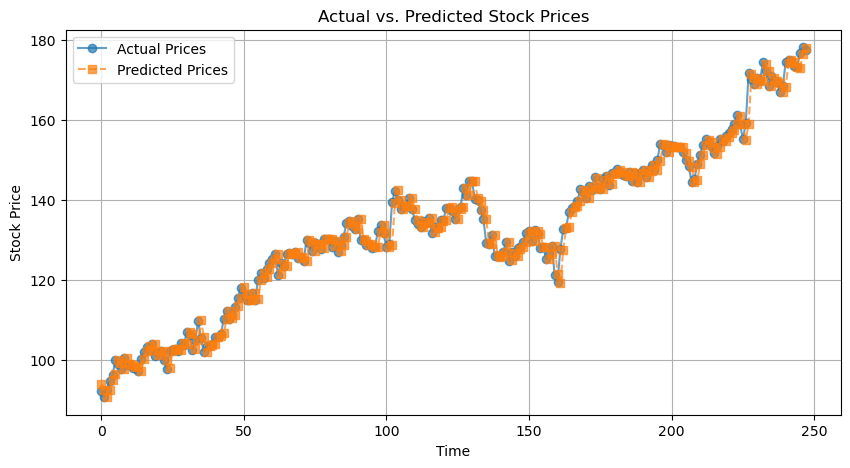

In [31]:
# Plot actual vs. predicted stock prices
plt.figure(figsize=(10, 5))
plt.plot(y_AMZN_test.values, label='Actual Prices', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_AMZN_pred, label='Predicted Prices', linestyle='--', marker='s', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

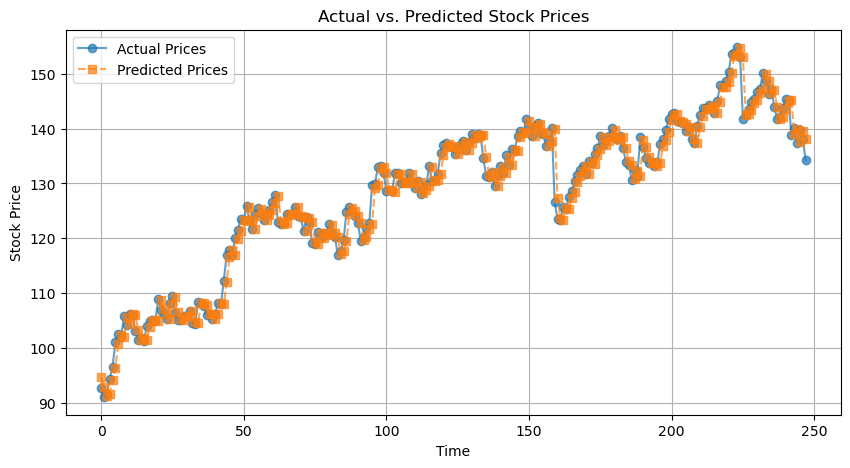

In [32]:
# Plot actual vs. predicted stock prices
plt.figure(figsize=(10, 5))
plt.plot(y_GOOG_test.values, label='Actual Prices', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_GOOG_pred, label='Predicted Prices', linestyle='--', marker='s', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

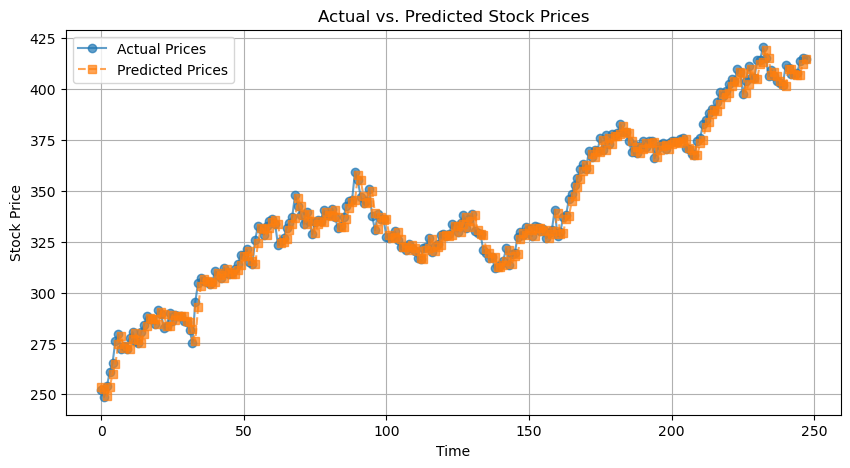

In [33]:
# Plot actual vs. predicted stock prices
plt.figure(figsize=(10, 5))
plt.plot(y_MSFT_test.values, label='Actual Prices', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_MSFT_pred, label='Predicted Prices', linestyle='--', marker='s', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

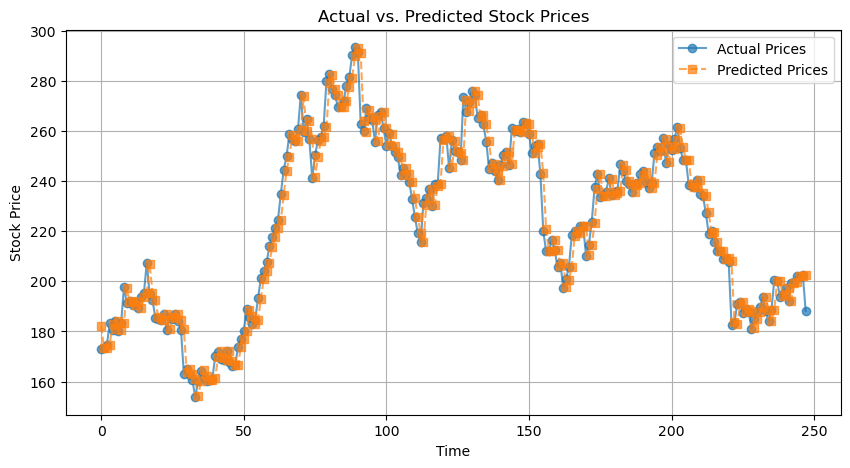

In [34]:
# Plot actual vs. predicted stock prices
plt.figure(figsize=(10, 5))
plt.plot(y_TSLA_test.values, label='Actual Prices', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_TSLA_pred, label='Predicted Prices', linestyle='--', marker='s', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [35]:
# Get the most recent data row
latest_data_AAPL = df_AAPL.iloc[-1][['d-1', 'd-2', 'd-3']].values.reshape(1, -1) # We will need to integrate the API call here to get the latest data from the website
# Predict the next day's closing price
next_day_price_AAPL = model_AAPL.predict(latest_data_AAPL)[0]

print(f'Predicted next day closing price: {next_day_price_AAPL:.2f}')

Predicted next day closing price: 179.68


c:\Users\Not for you\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
# Get the most recent data row
latest_data_AMZN = df_AMZN.iloc[-1][['d-1', 'd-2', 'd-3']].values.reshape(1, -1) # We will need to integrate the API call here to get the latest data from the website
# Predict the next day's closing price
next_day_price_AMZN = model_AMZN.predict(latest_data_AMZN)[0]

print(f'Predicted next day closing price: {next_day_price_AMZN:.2f}')

Predicted next day closing price: 178.12


c:\Users\Not for you\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
# Get the most recent data row
latest_data_GOOG = df_GOOG.iloc[-1][['d-1', 'd-2', 'd-3']].values.reshape(1, -1) # We will need to integrate the API call here to get the latest data from the website
# Predict the next day's closing price
next_day_price_GOOG = model_GOOG.predict(latest_data_GOOG)[0]

print(f'Predicted next day closing price: {next_day_price_GOOG:.2f}')

Predicted next day closing price: 138.08


c:\Users\Not for you\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
# Get the most recent data row
latest_data_MSFT = df_MSFT.iloc[-1][['d-1', 'd-2', 'd-3']].values.reshape(1, -1) # We will need to integrate the API call here to get the latest data from the website
# Predict the next day's closing price
next_day_price_MSFT = model_MSFT.predict(latest_data_MSFT)[0]

print(f'Predicted next day closing price: {next_day_price_MSFT:.2f}')

Predicted next day closing price: 414.62


c:\Users\Not for you\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
# Get the most recent data row
latest_data_TSLA = df_TSLA.iloc[-1][['d-1', 'd-2', 'd-3']].values.reshape(1, -1) # We will need to integrate the API call here to get the latest data from the website
# Predict the next day's closing price
next_day_price_TSLA = model_TSLA.predict(latest_data_TSLA)[0]

print(f'Predicted next day closing price: {next_day_price_TSLA:.2f}')

Predicted next day closing price: 202.66


c:\Users\Not for you\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
df_TSLA.iloc[-1][['d-1', 'd-2', 'd-3']].values.reshape(1, -1)

array([[202.64, 201.88, 202.04]], dtype=object)

In [41]:
import pickle

In [42]:
filename_AAPL='picklemodel_AAPL.pkl'
pickle.dump(model_AAPL,open(filename_AAPL,'wb'))

filename_AMZN='picklemodel_AMZN.pkl'
pickle.dump(model_AMZN,open(filename_AMZN,'wb'))

filename_GOOG='picklemodel_GOOG.pkl'
pickle.dump(model_GOOG,open(filename_GOOG,'wb'))

filename_MSFT='picklemodel_MSFT.pkl'
pickle.dump(model_MSFT,open(filename_MSFT,'wb'))

filename_TSLA='picklemodel_TSLA.pkl'
pickle.dump(model_TSLA,open(filename_TSLA,'wb'))

In [13]:
import requests
import logging
from datetime import datetime, timedelta
from Streamlit.Exceptions import InvalidFinalDate, InvalidInitialDate
from dotenv import load_dotenv
import os
import pandas as pd

logging.basicConfig(
    filename='app.log',
    filemode='w',
    level=logging.DEBUG,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

class PySimFin:
  def __init__(self):
    load_dotenv('api.env')
    self.__api_key=os.getenv('TMBD_API_KEY')
    self.__headers = {'accept':'application/json','Authorization': f'{self.__api_key}'}
    logging.info('API Key and authenticator set up correctly.')
  def get_share_prices(self,ticker:str,start:str,end:str):
    logging.info('Checking the initial and final dates to prevent errors in the web.')
    if start>end or start<'2018-03-05':
      raise InvalidInitialDate('Cannot input initial date greater than final date nor before 2018-03-05')
    elif end<start or end>'2025-03-04':
      raise InvalidFinalDate('Cannot input final date lower than initial date nor after 2025-03-04')
    else:
      new_start=str(datetime.strptime(start,'%Y-%m-%d').date()-timedelta(days=10))
      logging.info('Correct input dates, getting the response from the web.')
      self.__url=f'https://backend.simfin.com/api/v3/companies/prices/verbose?ticker={ticker}&start={new_start}&end={end}'
      response=requests.get(self.__url,headers=self.__headers)
      if response.status_code == 200:
        data = response.json()
        data_list=[]
        if data!=[]:
          for i in data[0]['data']:
            data_list.append(i['Last Closing Price'])
          last_list=data_list[-3:]
          return f'The closing prices for the given dates are: {last_list}'#\nThe predicted closing price for the next day is:{next_day_price:.2f}.'
        else:
          return f'No data available between {start} and {end}.'
      else:
        logging.error(f'Unable to retrieve data, error:{response.status_code}. Please check the definition of these mistakes to correct your input data:\n400 - Bad request\n404 - API not found\n429 - Rate limits exceeded, see section Rate Limits.')
   
  def get_financial_statements(self,ticker:str,year:str):
    self.__api_key='1c8ac883-1180-4ed0-93cc-cfff0a297631'
    self.__headers = {'accept':'application/json','Authorization': f'{self.__api_key}'}
    logging.info('API Key and authenticator set up correctly.')
    self.url=f'https://backend.simfin.com/api/v3/companies/statements/verbose?ticker={ticker}&statements=PL&fyear=2021%2C2023&start={str(int(year)-1)}-01-01&end={year}-01-01'
    response=requests.get(self.url,headers=self.__headers)
    if response.status_code == 200:
      data = response.json()
      fiscal_year=data[0]['statements'][0]['data'][0]['Fiscal Year']
      revenue=data[0]['statements'][0]['data'][0]['Revenue']
      gross_profit=data[0]['statements'][0]['data'][0]['Gross Profit']
      state_list=[fiscal_year,revenue,gross_profit]
      return state_list
    else:
        return f'No data available. {response.status_code}'
        logging.error(f'Unable to retrieve data, error:{response.status_code}. Please check the definition of these mistakes to correct your input data:\n400 - Bad request\n404 - API not found\n429 - Rate limits exceeded, see section Rate Limits.')

  def get_dataframe(self,ticker:str):
      self.__api_key='1c8ac883-1180-4ed0-93cc-cfff0a297631'
      self.__headers = {'accept':'application/json','Authorization': f'{self.__api_key}'}
      self.__url=f'https://backend.simfin.com/api/v3/companies/prices/verbose?ticker={ticker}&start=2024-03-05&end={(datetime.today()-timedelta(days=1)).strftime('%Y-%m-%d')}'
      response=requests.get(self.__url,headers=self.__headers)
      if response.status_code == 200:
        data = response.json()
        stock_data=data[0]['data']
        df=pd.DataFrame(stock_data)
        df=df[['Date','Last Closing Price']]
        df['Date']=pd.to_datetime(df['Date'])
        df=df.rename(columns={'Last Closing Price':'Close'})
        return df
      else:
        return f'error'
        logging.error(f'Unable to retrieve data, error:{response.status_code}. Please check the definition of these mistakes to correct your input data:\n400 - Bad request\n404 - API not found\n429 - Rate limits exceeded, see section Rate Limits.')


In [14]:
dataframe1=PySimFin().get_dataframe('AAPL')
dataframe1

,Date,Close
0,2024-03-05,170.12
1,2024-03-06,169.12
2,2024-03-07,169.00
3,2024-03-08,170.73
4,2024-03-11,172.75
...,...,...
252,2025-03-07,239.07
253,2025-03-10,227.48
254,2025-03-11,220.84
255,2025-03-12,216.98


In [6]:
state_data=PySimFin().get_financial_statements('AAPL','2021')
state_data

[2021, 111439000000, 44328000000]

In [2]:
data=[
  {
    "template": "GENERAL",
    "name": "APPLE INC",
    "id": 111052,
    "ticker": "AAPL",
    "currency": "USD",
    "isin": "US0378331005",
    "statements": [
      {
        "statement": "PL",
        "data": [
          {
            "Fiscal Period": "Q1",
            "Fiscal Year": 2021,
            "Report Date": "2020-12-31",
            "Publish Date": "2021-01-28",
            "Income (Loss) Including Minority Interest": 28755000000,
            "Net Income": 28755000000,
            "Net Income Available to Common Shareholders": 28755000000
          }
        ],
        "checks": [
          {
            "dataModel": 0.1429
          }
        ]
      }
    ]
  }
]

In [3]:
data[0]['statements'][0]['data'][0]['Fiscal Year']

2021

In [4]:
import datetime
import pandas as pd

datte=datetime.datetime.today().strftime('%Y-%m-%d')
datte

'2025-03-14'